## Mortgage Loans: Linear Regression Example

### Table of Contents

* [Read Data](#read_data)
* [EDA, Feature Engineering](#eda_feature)
    * [MSZoning](#mszoning)
    * [GarageType](#garagetype)
    * [HouseStyle](#housestyle)
    * [KitchenQual](#kitchenqual)
    * [BsmtQual](#bsmtqual)
    * [ExterQual](#exterqual)    
    * [ExterCond](#extercond)
    * [CentralAir](#centralair)
    * [SaleCondition](#salecondition)
    * [BldgType](#bldgtype)
    * [TotalSF](#totalsf)    
    * [Bathrooms](#bathrooms)
    * [Target SalePrice - Remove outliers ](#saleprice_remove_outliers)
* [Target](#target)
* [Standardize](#standardize)
* [Correlation Matrix](#correlation)
* [Model - Linear Regreassion - standardized vs non-standardized ](#model_lr)
* [No difference in predictions for standardized vs non-standardized ](#standardize_vs_non_standardized)
* [Evaluation](#evaluate)

### Read Data <a class="anchor" id="read_data"></a>

In [77]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
import scipy.stats as stats
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
scale= StandardScaler()

In [78]:
df = pd.read_csv('../data/ames_housing.csv')
df.shape

(1460, 81)

In [79]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


### EDA, Feature Engineering <a class="anchor" id="eda_feature"></a>

In [80]:
# get count of null values by column and only display coulmns that have non-zero count of null values
df[df.columns[df.isnull().any()].tolist()].isnull().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [81]:
# remove commercial zoning
#print(len(df.columns))
print(df.shape)
df=df[df['MSZoning'] != 'C (all)']    #drop 10 rows
print(df.shape)
df['MSZoning'].value_counts().head(10)

(1460, 81)
(1450, 81)


RL    1151
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64

In [82]:
#df_dummies=pd.get_dummies(df)

In [83]:
# this makes for too many columns!
# df_dummies.head(5)

In [84]:
### different ways of label encoding
## approach 1
# # FV - Floating Village retirement homes
# cond_zone = [df['MSZoning']=='RL',df['MSZoning']=='RM',df['MSZoning']=='FV',df['MSZoning']=='RH']
# val_zone = [4,3,2,1]
# df['MSZoning_num']=np.select(cond_zone, val_zone, default=0)

In [85]:
# # use map instaed of above
# zones = {'RL': 4, 'RM': 3, 'FV': 2, 'RH': 1}
# df['MSZoning_num2'] = df['MSZoning'].map(zones)

#### MSZoning <a class="anchor" id="mszoning"></a>

In [86]:
# map using dict and zip
df['MSZoning_num'] = df['MSZoning'].map(dict(zip(['RL','RM','FV','RH'],[4,3,2,1])))

In [87]:
print(df['GarageType'].value_counts().head(10))
df['GarageType'].isnull().sum()

Attchd     870
Detchd     381
BuiltIn     88
Basment     18
CarPort      8
2Types       6
Name: GarageType, dtype: int64


79

In [88]:
#### GarageType <a class="anchor" id="garagetype"></a>

In [89]:
# classify garages as attached / detached
df['GarageAttached']=np.where(
    (df['GarageType']=='Attchd') | (df['GarageType'] == 'BuiltIn') | (df['GarageType']=='Basment') | 
    (df['GarageType']=='2Types')
    ,1,0)

In [90]:
df['GarageAttached'].value_counts()

1    982
0    468
Name: GarageAttached, dtype: int64

In [91]:
#### HouseStyle <a class="anchor" id="housestyle"></a>

In [92]:
# # split house style into 1, 1.5, 2, 2.5
# # using np.where conditions
# conds = [df['HouseStyle']=='1Story', (df['HouseStyle']=='1.5Fin') | 
#     (df['HouseStyle']=='1.5Unf') | (df['HouseStyle']=='SLvl') | (df['HouseStyle']=='SFoyer'), (df['HouseStyle']=='2Story'), (df['HouseStyle']=='2.5Fin') | 
#     (df['HouseStyle']=='2.5Unf')]
# vals = [1,1.5,2,2.5]

# df['HouseStory']=np.select(conds, vals, default=0)
# df['HouseStory'].value_counts()

df['HouseStory']=np.where(df['HouseStyle']=='1Story',1,0)

In [93]:
# Create dummy variables for year sold
#df=pd.get_dummies(df, columns = ['YrSold'], prefix='YrSold', prefix_sep='_')

In [94]:
#### KitchenQual <a class="anchor" id="kitchenqual"></a>

In [95]:
df['KitchenQual'].value_counts().head(5)

TA    727
Gd    586
Ex    100
Fa     37
Name: KitchenQual, dtype: int64

In [96]:
# label kitchen qual
cond_kchn = [df['KitchenQual']=='Ex',df['KitchenQual']=='Gd',df['KitchenQual']=='TA',df['KitchenQual']=='Fa']
val_kchn = [4,3,2,1]
df['KitchenQual_num']=np.select(cond_kchn, val_kchn, default=0)

In [97]:
# dummies KitchenQual
#print(len(df.columns))
df=pd.get_dummies(df, columns = ['KitchenQual'], prefix='KitchenQual', prefix_sep='_')
#print(len(df.columns))

In [98]:
#### BsmtQual <a class="anchor" id="bsmtqual"></a>

In [99]:
df['BsmtQual'].value_counts().head(5)

TA    639
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [100]:
# label BsmtQual
cond_bsmt = [df['BsmtQual']=='Ex',df['BsmtQual']=='Gd',df['BsmtQual']=='TA',df['BsmtQual']=='Fa']
val_bsmt = [4,3,2,1]
df['BsmtQual_num']=np.select(cond_bsmt, val_bsmt, default=0)

In [101]:
# dummies BsmtQual
df=pd.get_dummies(df, columns = ['BsmtQual'], prefix='BsmtQual', prefix_sep='_')

In [102]:
#### ExterQual <a class="anchor" id="exterqual"></a>

In [103]:
df['ExterQual'].value_counts().head(5)

TA    899
Gd    488
Ex     52
Fa     11
Name: ExterQual, dtype: int64

In [104]:
cond_exter = [df['ExterQual']=='Ex',df['ExterQual']=='Gd',df['ExterQual']=='TA',df['ExterQual']=='Fa']
val_exter = [4,3,2,1]
df['ExterQual_num']=np.select(cond_exter,val_exter,default=0)

In [105]:
# Create dummy variables for ExterQual
df=pd.get_dummies(df, columns = ['ExterQual'], prefix='ExterQual', prefix_sep='_')

In [106]:
#### ExterCond <a class="anchor" id="extercond"></a>

In [107]:
df['ExterCond'].value_counts().head(5)

TA    1275
Gd     145
Fa      26
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [108]:
cond_exterCond = [df['ExterCond']=='Ex',df['ExterCond']=='Gd',df['ExterCond']=='TA',df['ExterCond']=='Fa',
                  df['ExterCond']=='Po']
val_exterCond = [5,4,3,2,1]
df['ExterCond_num']=np.select(cond_exterCond,val_exterCond,default=0)

In [109]:
# Create dummy variables for ExterCond
df=pd.get_dummies(df, columns = ['ExterCond'], prefix='ExterCond', prefix_sep='_')

In [110]:
#### CentralAir <a class="anchor" id="centralair"></a>

In [111]:
df['CentralAir'].value_counts()

Y    1361
N      89
Name: CentralAir, dtype: int64

In [112]:
df['CentralAir_num']=np.where(df['CentralAir']=='Y',1,0)

In [113]:
#### SaleCondition <a class="anchor" id="salecondition"></a>

In [114]:
df['SaleCondition'].value_counts()

Normal     1194
Partial     125
Abnorml      96
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [115]:
# remove abnormal and inter-family sale condition
#print(len(df.columns))
#print(df.shape)
df=df[(df['SaleCondition'] != 'Abnorml')]    #drop 10 rows
#print(df.shape)
df=df[(df['SaleCondition'] != 'Family')] 
#print(df.shape)

In [116]:
df['SaleCondition'].value_counts()

Normal     1194
Partial     125
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [117]:
df['SaleCondition_num'] = np.where(df['SaleCondition']=='Normal',1,0)

In [118]:
df['SaleCondition_num'].value_counts()

1    1194
0     140
Name: SaleCondition_num, dtype: int64

In [119]:
#### BldgType <a class="anchor" id="bldgtype"></a>

In [120]:
# recoding building type
#print(df['BldgType'].value_counts())
df['SingleFam']=np.where(df['BldgType']=='1Fam',1,0)
#print(df['SingleFam'].value_counts())

In [121]:
#### TotalSF <a class="anchor" id="totalsf"></a>

In [122]:
# recoding total square feet
df['TotalSF'] = df['TotalBsmtSF']+df['1stFlrSF']+df['2ndFlrSF']
df['TotalSF'].describe()

count     1334.000000
mean      2578.768366
std        821.692898
min        334.000000
25%       2020.500000
50%       2491.500000
75%       3026.250000
max      11752.000000
Name: TotalSF, dtype: float64

In [123]:
# bedrooms
df['BedroomAbvGr'].describe()

count    1334.000000
mean        2.863568
std         0.799085
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: BedroomAbvGr, dtype: float64

In [124]:
#### Bathrooms <a class="anchor" id="bathrooms"></a>

In [125]:
# recoding bathrooms
df['Bathrooms']=df['FullBath']+(.5*df['HalfBath'])
df['Bathrooms'].describe()

count    1334.000000
mean        1.778111
std         0.631934
min         0.000000
25%         1.000000
50%         2.000000
75%         2.500000
max         3.500000
Name: Bathrooms, dtype: float64

In [126]:
df['OverallQual'].value_counts()

5     352
6     342
7     303
8     159
4     100
9      42
10     17
3      15
1       2
2       2
Name: OverallQual, dtype: int64

In [127]:
df['OverallCond'].value_counts()

5    756
6    230
7    184
8     71
4     48
9     21
3     20
2      3
1      1
Name: OverallCond, dtype: int64

### Target <a class="anchor" id="target"></a>

In [128]:
# target
print(df['SalePrice'].describe())

count      1334.000000
mean     184358.968516
std       78771.015650
min       39300.000000
25%      132500.000000
50%      166500.000000
75%      216375.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [129]:
#### Target SalePrice - Remove outliers <a class="anchor" id="saleprice_remove outliers"></a>

In [130]:
# remove extreme outliers
print(df.shape[0])
cutpoint_high = df['SalePrice'].mean()+3* df['SalePrice'].std()
print(cutpoint_high)
cutpoint_low = df['SalePrice'].mean()-3* df['SalePrice'].std()
print(cutpoint_low)
df=df[(df['SalePrice']<=cutpoint_high) & (df['SalePrice']>=cutpoint_low)].copy()
print(df.shape[0])

1334
420672.0154647251
-51954.07843324082
1313


In [131]:
def plot_feature(df, feature_name, xlabel_text, shape):
    (mu, sigma) = stats.norm.fit(df)    
    plt.figure(figsize=shape)
    sns.distplot(df, kde=True, hist=True, fit=stats.norm, color="tomato")
    #sns.histplot(df, bins=30)
    plt.title(feature_name + ' Distribution vs Normal Distribution', fontsize=14)
    plt.xlabel(xlabel_text,    fontsize=12)
    plt.ylabel("Frequency %",  fontsize=12)
    plt.legend(['Normal Dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='upper center')
    plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


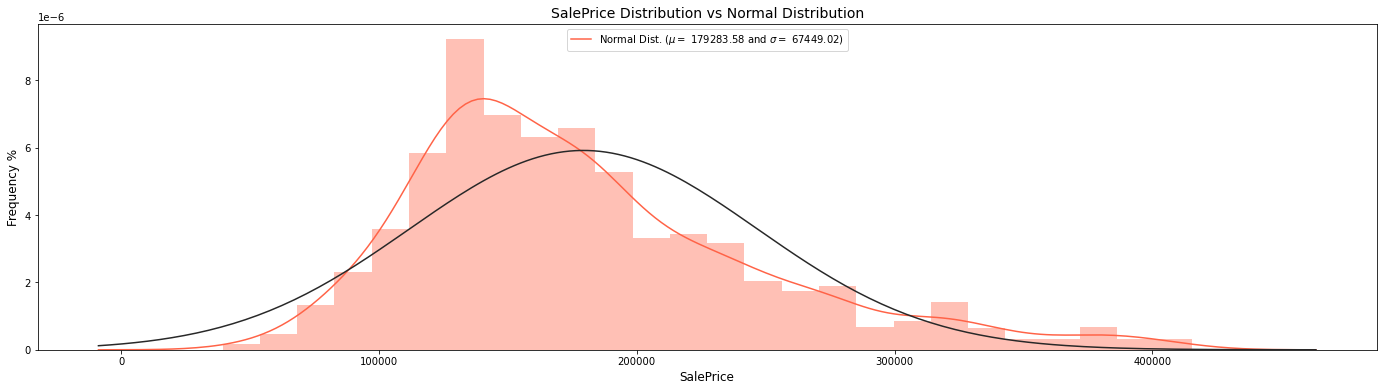

In [132]:
feature_name = 'SalePrice'
plot_feature(df[feature_name], feature_name, feature_name, (24,6))

In [133]:
# log Saleprice
df["LogSalePrice"] = df['SalePrice'].apply(np.log)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


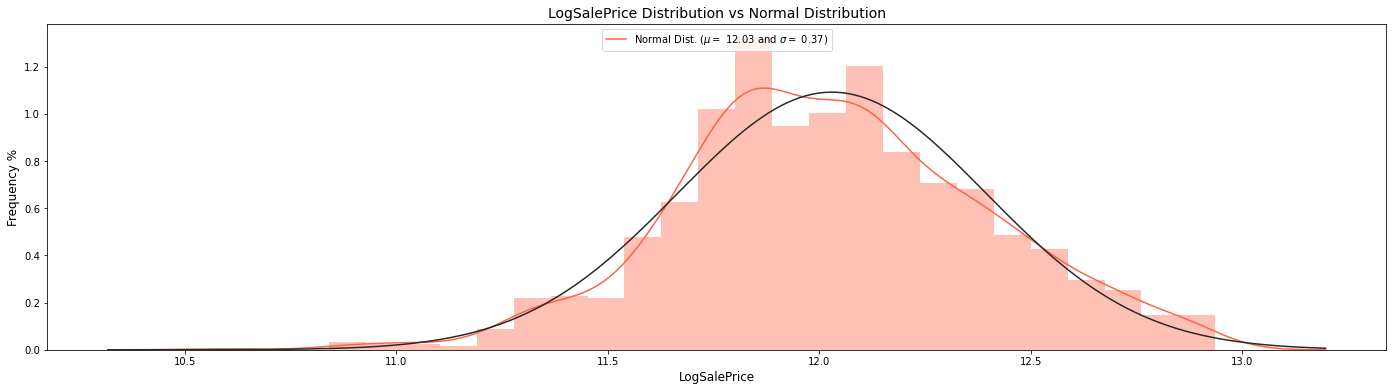

In [134]:
feature_name = 'LogSalePrice'
plot_feature(df[feature_name], feature_name, feature_name, (24,6))

#### Correlation Matrix<a class="anchor" id="correlation"></a>

In [135]:
df_model=df[['SalePrice','LogSalePrice','YearBuilt','YearRemodAdd','OverallQual', 'OverallCond', 'MSZoning_num','GarageAttached',
             'HouseStory','YrSold','TotalSF','SingleFam','SaleCondition_num','CentralAir_num',
             'KitchenQual_num','KitchenQual_Ex','KitchenQual_Fa','KitchenQual_Gd','KitchenQual_TA',
            'BsmtQual_num','BsmtQual_Ex','BsmtQual_Fa','BsmtQual_Gd','BsmtQual_TA',
            'ExterQual_num','ExterQual_Ex','ExterQual_Fa','ExterQual_Gd','ExterQual_TA',
            'ExterCond_num','ExterCond_Ex','ExterCond_Fa','ExterCond_Gd','ExterCond_TA','ExterCond_Po',
            'BedroomAbvGr','Bathrooms']]

In [136]:
corrs = df_model.corr()

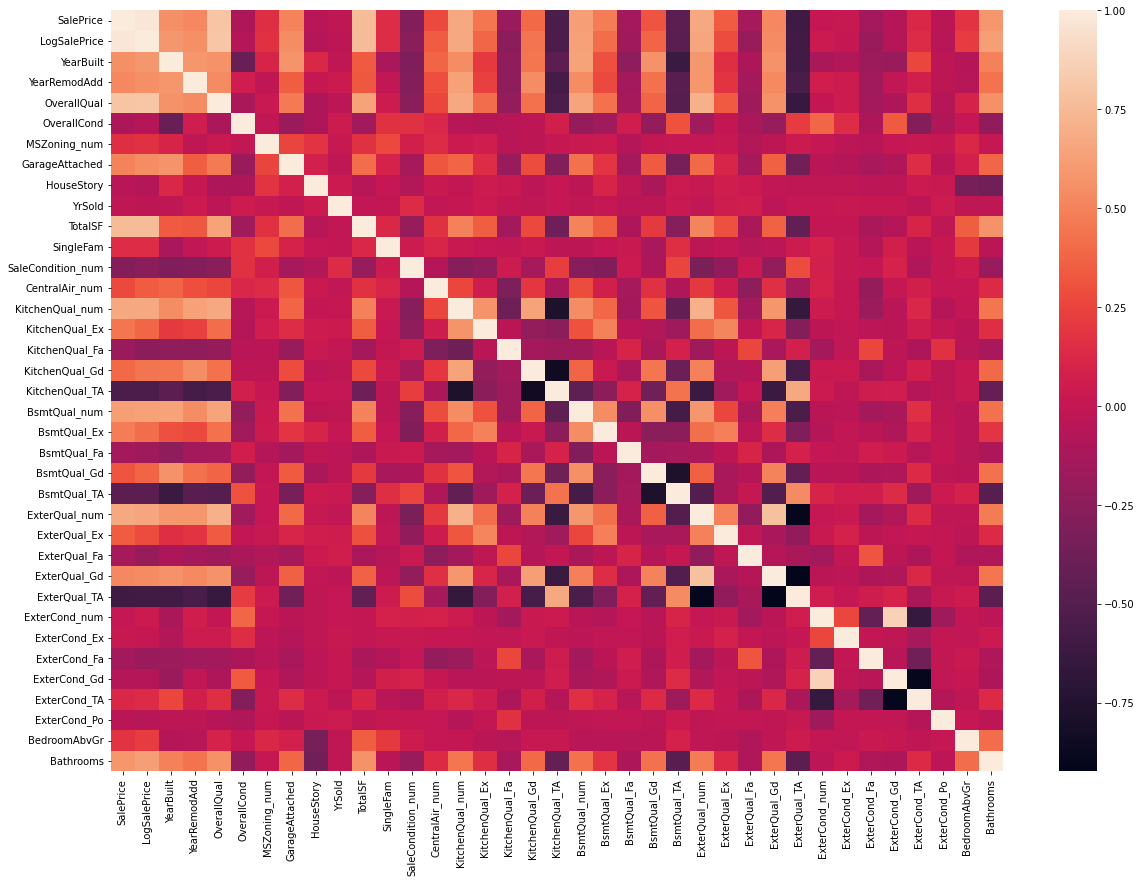

In [137]:
# Display all this as a heatmap
plt.figure(figsize=(20,14))
sns.heatmap(corrs);

In [138]:
corrs['SalePrice'].sort_values(ascending=False)

SalePrice            1.000000
LogSalePrice         0.970093
OverallQual          0.798509
TotalSF              0.757994
ExterQual_num        0.670332
KitchenQual_num      0.670318
BsmtQual_num         0.623323
Bathrooms            0.584163
YearBuilt            0.549047
YearRemodAdd         0.522181
ExterQual_Gd         0.520546
GarageAttached       0.496400
BsmtQual_Ex          0.478370
KitchenQual_Ex       0.445586
KitchenQual_Gd       0.396814
ExterQual_Ex         0.345465
BsmtQual_Gd          0.309672
CentralAir_num       0.266672
BedroomAbvGr         0.177372
MSZoning_num         0.151884
SingleFam            0.148466
ExterCond_TA         0.125618
ExterCond_Ex         0.015644
ExterCond_num        0.003849
YrSold              -0.017460
ExterCond_Po        -0.042071
HouseStory          -0.049426
ExterCond_Gd        -0.071859
OverallCond         -0.098340
ExterQual_Fa        -0.127680
BsmtQual_Fa         -0.138542
ExterCond_Fa        -0.141793
KitchenQual_Fa      -0.184638
SaleCondit

In [139]:
corrs['LogSalePrice'].sort_values(ascending=False)

LogSalePrice         1.000000
SalePrice            0.970093
OverallQual          0.810900
TotalSF              0.763533
KitchenQual_num      0.669907
ExterQual_num        0.657680
BsmtQual_num         0.638119
Bathrooms            0.618134
YearBuilt            0.588127
YearRemodAdd         0.552593
GarageAttached       0.548516
ExterQual_Gd         0.538775
KitchenQual_Gd       0.442292
BsmtQual_Ex          0.406729
KitchenQual_Ex       0.377729
BsmtQual_Gd          0.371703
CentralAir_num       0.345309
ExterQual_Ex         0.282875
BedroomAbvGr         0.214860
MSZoning_num         0.172844
SingleFam            0.148129
ExterCond_TA         0.137881
ExterCond_num        0.030927
ExterCond_Ex         0.011751
YrSold              -0.024956
ExterCond_Po        -0.059343
ExterCond_Gd        -0.062539
OverallCond         -0.063563
HouseStory          -0.070136
BsmtQual_Fa         -0.163858
ExterCond_Fa        -0.187411
ExterQual_Fa        -0.187791
KitchenQual_Fa      -0.241790
SaleCondit

### Feature Sets <a class="anchor" id="feature_sets"></a>

In [140]:
# confirm no missing data
df_X = df[['OverallQual','TotalSF','KitchenQual_num','ExterQual_num','BsmtQual_num','Bathrooms','YearBuilt',
           'YearRemodAdd','GarageAttached','CentralAir_num',
          'BedroomAbvGr','MSZoning_num','SingleFam','HouseStory','YrSold',]]
df_X.isnull().sum()

OverallQual        0
TotalSF            0
KitchenQual_num    0
ExterQual_num      0
BsmtQual_num       0
Bathrooms          0
YearBuilt          0
YearRemodAdd       0
GarageAttached     0
CentralAir_num     0
BedroomAbvGr       0
MSZoning_num       0
SingleFam          0
HouseStory         0
YrSold             0
dtype: int64

In [141]:
# confirm all numerical
df_X.dtypes

OverallQual          int64
TotalSF              int64
KitchenQual_num      int64
ExterQual_num        int64
BsmtQual_num         int64
Bathrooms          float64
YearBuilt            int64
YearRemodAdd         int64
GarageAttached       int64
CentralAir_num       int64
BedroomAbvGr         int64
MSZoning_num         int64
SingleFam            int64
HouseStory           int64
YrSold               int64
dtype: object

### Model - Linear Regression - standardised vs non-standardized <a class="anchor" id="model_lr"></a>

In [142]:
# declare features and target
y = df['SalePrice']
X = df_X
print(y.shape, X.shape)

(1313,) (1313, 15)


In [143]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=12)

#### Standardize <a class="anchor" id="standardize"></a>

In [144]:
# standardization of dependent variables - fit and transform training data
scaled_X_train = scale.fit_transform(X_train) 

In [145]:
# standardization of dependent variables - fit and transform training data
Scaled_X_test = scale.transform(X_test)

In [146]:
# Fit the model to the training dataset
mymodel = LinearRegression()
#mymodel.fit(scaled_X_train, y_train)
mymodel.fit(X_train, y_train)

LinearRegression()

In [147]:
# Fit the model to the training dataset
mymodel2 = LinearRegression()
mymodel2.fit(scaled_X_train, y_train)

LinearRegression()

In [148]:
# coefficients and intercept
mymodel.intercept_
mymodel.coef_

array([16589.02107638,    25.48332662, 13874.04015932,  8592.63045369,
        5643.47754404,  7250.66780929,    92.78476754,    27.11219232,
        6370.94513956,  -341.40234121,   473.50343289,  5586.61670491,
       15482.05196612,  2454.4814095 ,   185.78461862])

In [149]:
# coefficients and intercept
mymodel2.intercept_
mymodel2.coef_

array([22522.37122564, 20391.76269234,  9020.67011588,  4807.63938773,
        4507.15176715,  4487.18223333,  2762.99180754,   559.10402556,
        2969.68915057,   -82.32602841,   366.76610086,  3185.60938122,
        5595.21629203,  1227.23056491,   244.16333679])

In [150]:
df_coefs = pd.DataFrame(mymodel.coef_ , X.columns)
df_coefs

,0
OverallQual,16589.021076
TotalSF,25.483327
KitchenQual_num,13874.040159
ExterQual_num,8592.630454
BsmtQual_num,5643.477544
Bathrooms,7250.667809
YearBuilt,92.784768
YearRemodAdd,27.112192
GarageAttached,6370.945140
CentralAir_num,-341.402341


In [151]:
df_coefs2 = pd.DataFrame(mymodel2.coef_ , X.columns)
df_coefs2

,0
OverallQual,22522.371226
TotalSF,20391.762692
KitchenQual_num,9020.670116
ExterQual_num,4807.639388
BsmtQual_num,4507.151767
Bathrooms,4487.182233
YearBuilt,2762.991808
YearRemodAdd,559.104026
GarageAttached,2969.689151
CentralAir_num,-82.326028


In [152]:
# # what is the equation for this model?
# cols=list(X.columns)
# coefs=list(mymodel.coef_)
# xcoefs = [(coefs[i], cols[i]) for i in range(0, len(cols))]
# equation = f'y = {round(mymodel.intercept_,4)} + {round(xcoefs[0][0],4)}*{xcoefs[0][1]} + {round(xcoefs[1][0],4)}*{xcoefs[1][1]} + {round(xcoefs[2][0],4)}*{xcoefs[2][1]} + {round(xcoefs[3][0],4)}*{xcoefs[3][1]}+ {round(xcoefs[4][0],4)}*{xcoefs[4][1]}+ {round(xcoefs[5][0],4)}*{xcoefs[5][1]} + {round(xcoefs[6][0],4)}*{xcoefs[6][1]} + {round(xcoefs[7][0],4)}*{xcoefs[7][1]} + {round(xcoefs[8][0],4)}*{xcoefs[8][1]} '
# print("Regression Equation: ", equation)  

In [164]:
#### No difference in predictions for standardized vs non-standardized <a class="anchor" id="standardize_vs_non_standardized"></a>

In [153]:
# Predict the y-values on the testing dataset & examine the first few
y_preds = [int(x) for x in mymodel.predict(X_test)]
print(list(y_test[:5]))
print(y_preds[:5])

[201000, 180000, 148000, 149350, 374000]
[242037, 215721, 146976, 164710, 299724]


In [154]:
# Predict the y-values on the testing dataset & examine the first few
y_preds2 = [int(x) for x in mymodel2.predict(Scaled_X_test)]
print(list(y_test[:5]))
print(y_preds2[:5])

[201000, 180000, 148000, 149350, 374000]
[242037, 215721, 146976, 164710, 299724]


## Model Evaluation

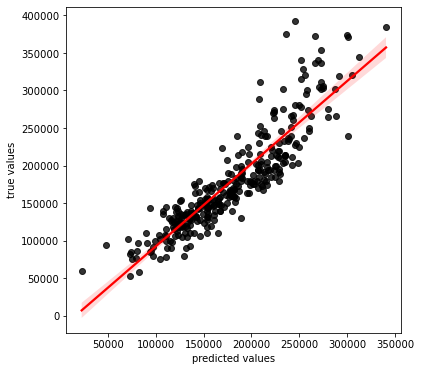

In [155]:
# compare predictions to known values
plt.figure(figsize=(6,6))
ax = sns.regplot(x = y_preds, 
                 y = y_test, 
                 scatter_kws={"color": "black"}, 
                 line_kws={"color": "red"})
ax.set(xlabel='predicted values', ylabel='true values');

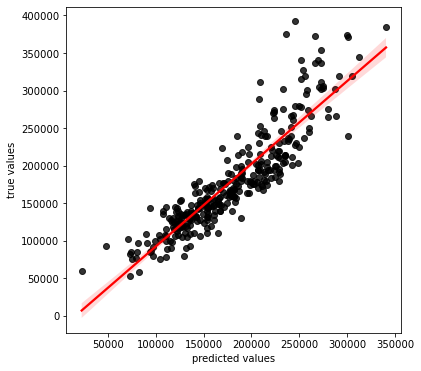

In [156]:
# compare predictions to known values
plt.figure(figsize=(6,6))
ax = sns.regplot(x = y_preds2, 
                 y = y_test, 
                 scatter_kws={"color": "black"}, 
                 line_kws={"color": "red"})
ax.set(xlabel='predicted values', ylabel='true values');

In [157]:
# R-2 (coefficient of determination)
r2 = metrics.r2_score(y_test, y_preds)
round(r2, 2)

0.8

In [158]:
# R-2 (coefficient of determination)
r2 = metrics.r2_score(y_test, y_preds2)
round(r2, 2)

0.8

In [159]:
mymodel.score(X_test, y_test)

0.8001141634253651

In [160]:
mymodel2.score(Scaled_X_test, y_test)

0.8001141634253657

In [161]:
# root mean sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_preds))
rmse

29694.64445082295

In [162]:
# root mean sq error
rmse2 = sqrt(metrics.mean_squared_error(y_test, y_preds2))
rmse2

29694.64445082295

In [163]:
# is that more or less than if we just used the average as our model?
avg_val = y_train.mean()
comparison = np.full((len(y_test), ), avg_val)
baseline=sqrt(metrics.mean_squared_error(y_test, comparison))
print(round(baseline,2))
print(round(rmse,2))
print('improvement:',round(rmse-baseline,2))

66424.62
29694.64
improvement: -36729.97


## Make new predictions

In [ ]:
# remember the linear regression equation?
print(equation)

In [ ]:
# make some fake data
fake1= [[2010, 2, 3, 2000, 1,0]] # modest SF home
fake2= [[2015, 3, 5, 4000, 1,1]] # large SF home in big neighborhood
fake3= [[1980, 1, 2, 1000, 0,0]] # small home, not SF, outside big neighborhood

In [ ]:
# make predictions just using our equation:
for data in [fake1, fake2, fake3]:
    YearBuilt=data[0][0]
    Bathrooms=data[0][1]
    BedroomAbvGr=data[0][2]
    TotalSF=data[0][3]
    SingleFam=data[0][4]
    LargeNeighborhood=data[0][5]
    y = -1360501.3809 + 704.4287*YearBuilt + 12738.4775*Bathrooms + -7783.1712*BedroomAbvGr + 49.824*TotalSF+ 25282.091*SingleFam+ -6637.2636*LargeNeighborhood 
    print('$',int(y))

In [ ]:
# pickle your model
import pickle
filename = open('ames_housing_lr_model.pkl', 'wb')
pickle.dump(mymodel, filename)
filename.close()

In [ ]:
## read in our pickle file
filename = open('ames_housing_lr_model.pkl', 'rb')
unpickled_model = pickle.load(filename)
filename.close()

In [ ]:
# make predictions
for data in [fake1, fake2, fake3]:
    print('$',int(unpickled_model.predict(data)))

## Turn that into a function

In [ ]:
def ames_lr_function(YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood):
    checksum=0
    for var in [YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood]:
        if isinstance(var,int)==False:
            checksum+=1
    if (YearBuilt<1900)|(YearBuilt>2020):
        checksum+=1
    if (Bathrooms<1) | (Bathrooms>5):
        checksum+=1
    if (BedroomAbvGr<1) | (BedroomAbvGr>5):
        checksum+=1
    if (TotalSF<100)|(TotalSF>5000):
        checksum+=1
    if (SingleFam!=0) & (SingleFam!=1):
        checksum+=1
    if (LargeNeighborhood!=0) & (LargeNeighborhood!=1):
        checksum+=1
    if checksum>0:
        return "Please provide adequate inputs"
    else:
        y = [-1360501.3809 + 704.4287*YearBuilt + 12738.4775*Bathrooms + -7783.1712*BedroomAbvGr + 49.824*TotalSF+ 25282.091*SingleFam+ -6637.2636*LargeNeighborhood]
#         y = unpickled_model.predict([[YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood]])
        formatted_y = "${:,.2f}".format(y[0])
        return formatted_y 

In [ ]:
# test the function
YearBuilt=2015
Bathrooms=3
BedroomAbvGr=3
TotalSF=2000
SingleFam=0
LargeNeighborhood=1
ames_lr_function(YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood)